<a href="https://colab.research.google.com/github/twyeh/university-physics/blob/%E9%9B%BB%E7%A3%81%E5%AD%B8/%E9%BB%9E%E5%B8%B6%E9%9B%BB%E9%AB%94%E7%9A%84%E9%9B%BB%E5%A0%B4%E5%88%86%E5%B8%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

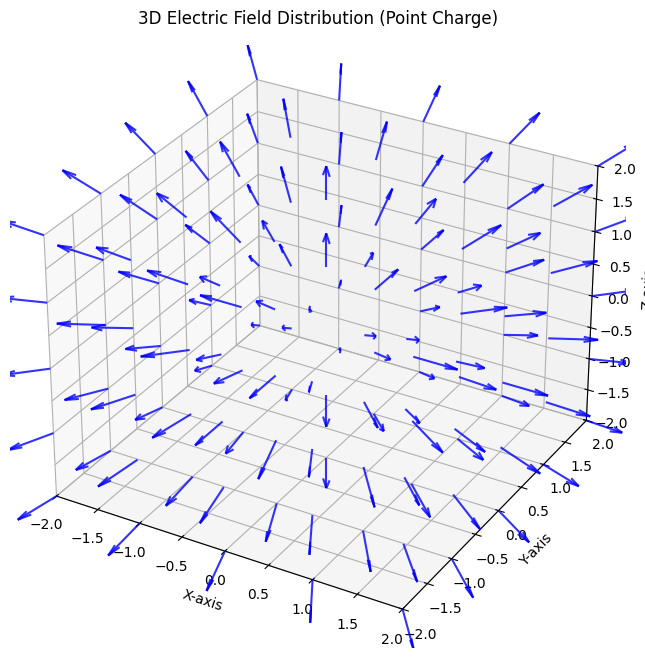

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- 1. 定義常數與公式 ---
Q = 1.0  # 電荷量 (C)
k = 1.0  # 簡化常數 k = 1/(4*pi*epsilon0)

def E_field(x, y, z):
    """計算點 (x, y, z) 處的電場向量 (Ex, Ey, Ez)"""
    r_sq = x**2 + y**2 + z**2
    r = np.sqrt(r_sq)
    if r == 0:
        return 0, 0, 0 # 避免中心點發散

    # 電場大小 E = k * Q / r^2
    E_mag = k * Q / r_sq

    # E 的 x, y, z 分量: E_x = E * (x/r), E_y = E * (y/r), ...
    Ex = E_mag * (x / r)
    Ey = E_mag * (y / r)
    Ez = E_mag * (z / r)
    return Ex, Ey, Ez

# --- 2. 設定網格點 (Quiver Plot) ---
# 選擇要在哪些空間點上繪製電場向量
L = 2.0  # 空間範圍 (-L 到 +L)
N = 5    # 每軸的取樣點數
X = np.linspace(-L, L, N)
Y = np.linspace(-L, L, N)
Z = np.linspace(-L, L, N)

# 創建 3D 網格
X, Y, Z = np.meshgrid(X, Y, Z)

# --- 3. 計算每個網格點上的電場向量 ---
# 將 3D 網格展平以便於計算
X_flat = X.flatten()
Y_flat = Y.flatten()
Z_flat = Z.flatten()

# 對每個點計算電場向量
U, V, W = np.zeros_like(X_flat), np.zeros_like(Y_flat), np.zeros_like(Z_flat)
for i in range(len(X_flat)):
    U[i], V[i], W[i] = E_field(X_flat[i], Y_flat[i], Z_flat[i])

# --- 4. 繪製 3D 向量場 ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 繪製箭頭 (Quiver)
# length: 箭頭長度, normalize: 標準化箭頭長度以避免過大差異
ax.quiver(X_flat, Y_flat, Z_flat, U, V, W, length=0.5, normalize=True, color='blue', alpha=0.8)

# 設定圖表細節
ax.set_title('3D Electric Field Distribution (Point Charge)')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_xlim([-L, L])
ax.set_ylim([-L, L])
ax.set_zlim([-L, L])

plt.show()